# Particle Phys. Exp. Seminar 1

In [1]:
using Random
using Distributions
using Statistics
using Plots
using Plots.PlotMeasures
using StatsPlots
using LaTeXStrings
using Printf

In [2]:
default(
    size=(800,600),
    linewidth=2,
    grid=true,
    gridstyle=:dash,
    gridalpha=0.8,
    minorgridstyle=:dash,
    minorgridalpha=0.5,
    fontfamily="Times",
    titlefontsize=20,
    labelfontsize=18,
    tickfontsize=12,
    legendfontsize=16,
    foreground_color_legend=nothing,
    background_color_legend=colorant"rgba(255,255,255,0.6)"
)

# Basic Descriptive Statistics

## Mean, Std. Dev. in Gauss

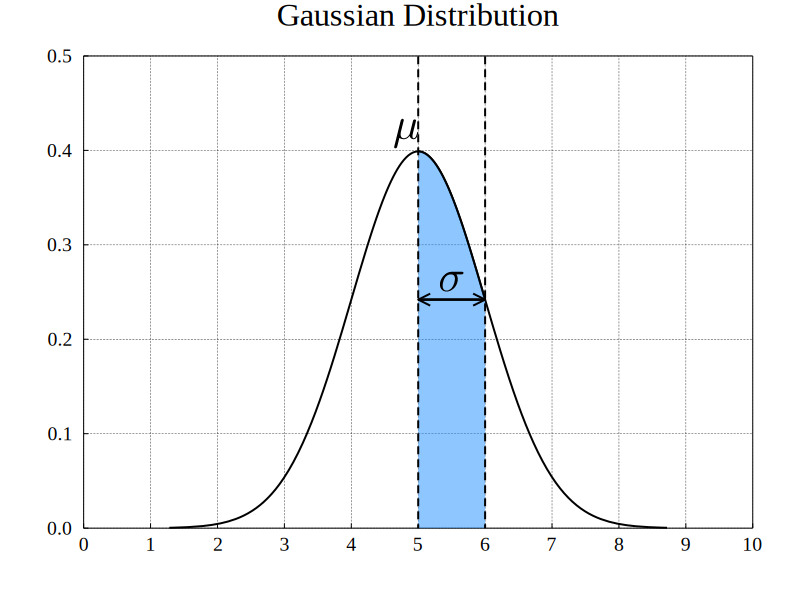

In [3]:
μ = 5
σ = 1
gausdist = Normal(μ, σ)
plt=plot(
    gausdist,
    color=:black,
    label=false,
    legendfontsize=16,
    framestyle=:box,
    top_margin=5mm,
    margin=10mm
)

# Fill 1σ region
x₁ = μ:0.01:μ+σ
y₁ = pdf.(gausdist, x₁)
y1σ = last(y₁)
plot!(
    x₁,
    y₁,
    color=:black,
    fill=(0,0.5,:dodgerblue),
    label=false,
)
plot!(
    [μ, μ+σ],
    [y1σ, y1σ],
    color=:black,
    arrow=:both,
    label=false,
)
xticks!((-5:1:6) .*σ .+ μ)

# Draw μ, μ+σ
vline!(
    [μ, μ+σ],
    color=:black,
    ls=:dash,
    label=false,
)



# Annotate
annotate!(μ+σ/2, y1σ, text(L"\sigma", :black, :center, :bottom, 30, "Times"))
annotate!(μ, maximum(y₁), text(L"\mu", :black, :right, :bottom, 30, "Times"))


title!("Gaussian Distribution")
xlims!(μ-5σ, μ+5σ)
ylims!(0,0.5)

savefig("img/BasicDescStatGaus.svg")
display(plt)

## Mean, Median, and Mode

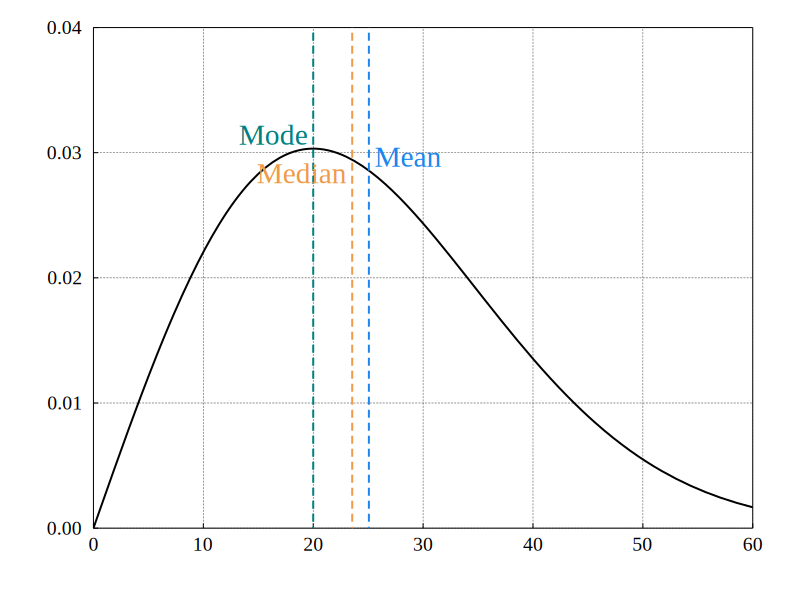

In [4]:
σ = 20
dist = Rayleigh(σ)
plt=plot(
    dist,
    color=:black,
    label=false,
    legendfontsize=16,
    framestyle=:box,
    top_margin=5mm,
    margin=10mm
)

# Annotate Mode
vline!(
    [mode(dist)],
    color=:teal,
    ls=:dash,
    label=false
)
annotate!(
    mode(dist)-0.5,
    pdf(dist, mode(dist)),
    text("Mode", :teal, :right, :bottom, 18, "Times")
)

# Annotate Median
vline!(
    [median(dist)],
    color=:tan2,
    ls=:dash,
    label=false
)
annotate!(
    median(dist)-0.5,
    pdf(dist, median(dist)),
    text("Median", :tan2, :right, :top, 18, "Times")
)

# Annotate Mean
vline!(
    [mean(dist)],
    color=:dodgerblue2,
    ls=:dash,
    label=false
)
annotate!(
    mean(dist)+0.5,
    pdf(dist, mean(dist)),
    text("Mean", :dodgerblue2, :left, :bottom, 18, "Times")
)

xlims!(0, 60)
ylims!(0,0.04)

savefig("img/MeanMedMode.svg")
display(plt)

## Correlations

### Normal x Normal

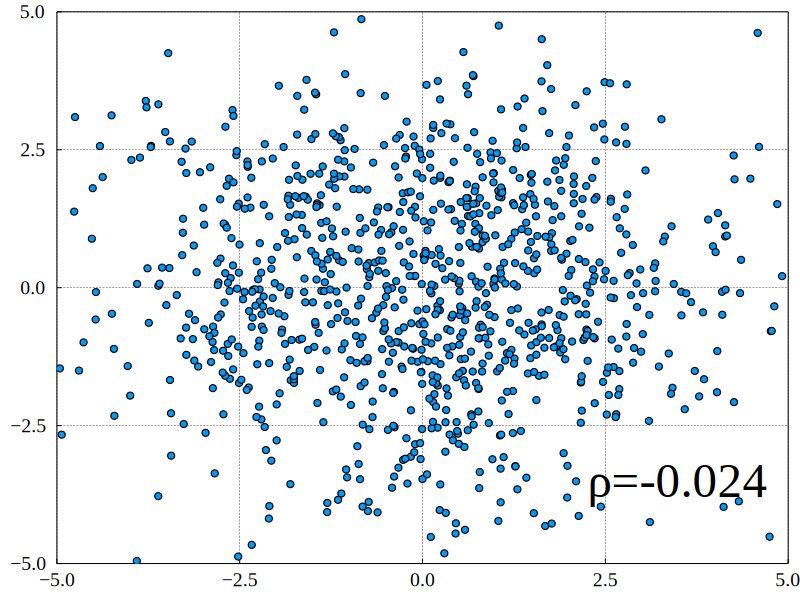

In [5]:
x = rand(Normal(0,2), 1000)
y = rand(Normal(0,2), 1000)
plt=scatter(
    x,
    y,
    framestyle=:box,
    legend=false,
    xlims=(-5,5),
    ylims=(-5,5),
)
annotate!(
    3.5,
    -3.5,
    text(@sprintf("ρ=%.3f",cor(x,y)), :black, 30, "Times")
)

savefig("img/CorNorm.svg")
display(plt)

### Linear + Noise

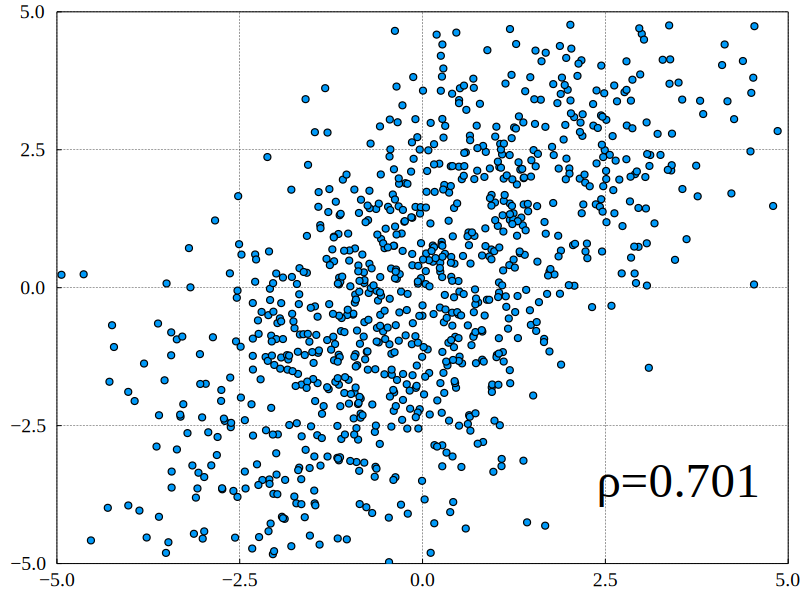

In [6]:
x = rand(Normal(0,2), 1000)
y = x .+ rand(Normal(0,2), 1000)
plt=scatter(
    x,
    y,
    framestyle=:box,
    legend=false,
    xlims=(-5,5),
    ylims=(-5,5),
)
annotate!(
    3.5,
    -3.5,
    text(@sprintf("ρ=%.3f",cor(x,y)), :black, 30, "Times")
)

savefig("img/CorLin.svg")
display(plt)

### $x^2$

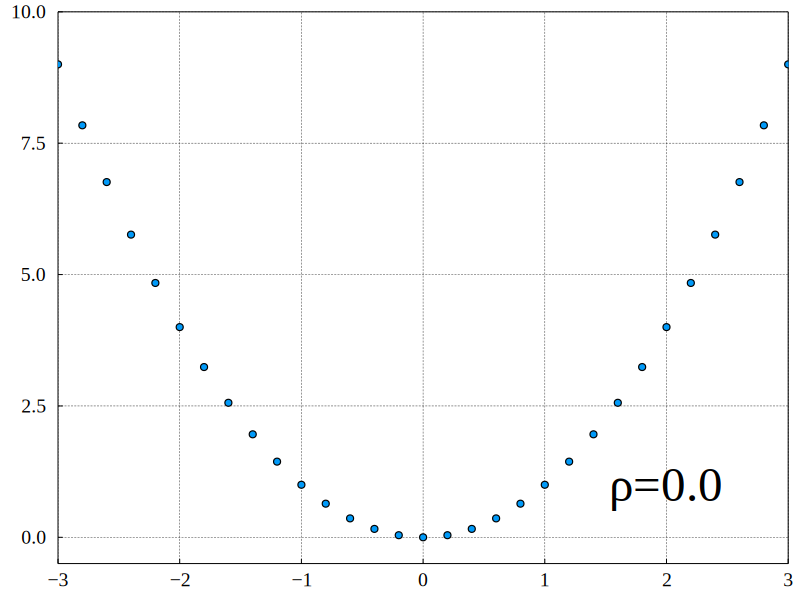

In [7]:
x = -5:0.2:5
y = x.^2
plt=scatter(
    x,
    y,
    framestyle=:box,
    legend=false,
    xlims=(-3,3),
    ylims=(-0.5,10),
)
annotate!(
    2, 1,
    text(@sprintf("ρ=%.1f",cor(x,y)), :black, 30, "Times")
)
savefig("img/CorPara.svg")
display(plt)

## FWHM

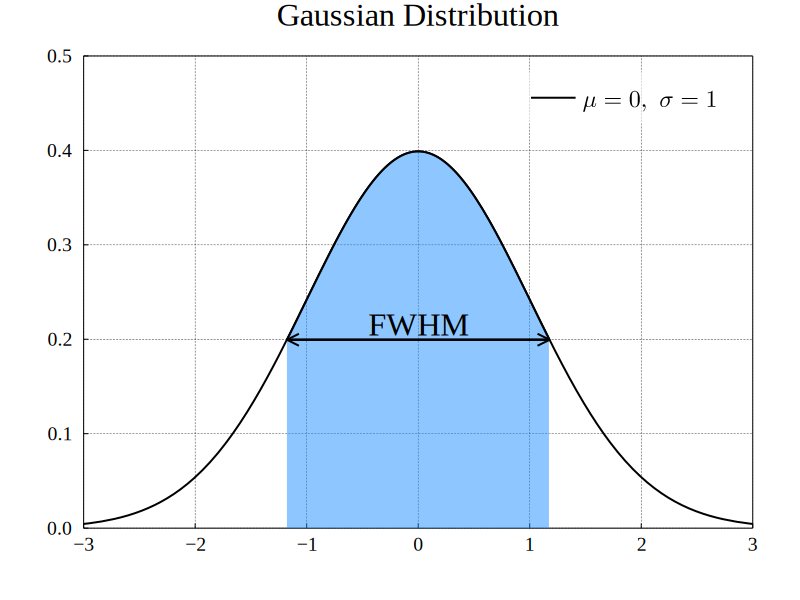

In [8]:
μ = 0
σ = 1
gausdist = Normal(μ, σ)
plt=plot(
    gausdist,
    color=:black,
    label=L"$\mu=%$μ, \ \sigma=%$σ$",
    legendfontsize=16,
    framestyle=:box,
    top_margin=5mm,
    margin=10mm
)

# Fill FWHM region
HWHM = √(2*log(2))*σ
FWHM = μ-HWHM:0.01:μ+HWHM
y = pdf.(gausdist, FWHM)
ymax = maximum(y)
yFWHM = ymax/2
plot!(
    FWHM,
    y,
    color=:black,
    fill=(0,0.5,:dodgerblue),
    label=false,
)
plot!(
    [μ-HWHM, μ+HWHM],
    [yFWHM, yFWHM],
    color=:black,
    arrow=:both,
    label=false,
)
xticks!((-5:1:6) .*σ .+ μ)

# Annotate
annotate!(μ, yFWHM, text("FWHM", :black, :center, :bottom, 20, "Times"))

title!("Gaussian Distribution")
xlims!(μ-3σ, μ+3σ)
ylims!(0,0.5)

savefig("img/GaussFWHM.svg")
display(plt)

## Quartiles

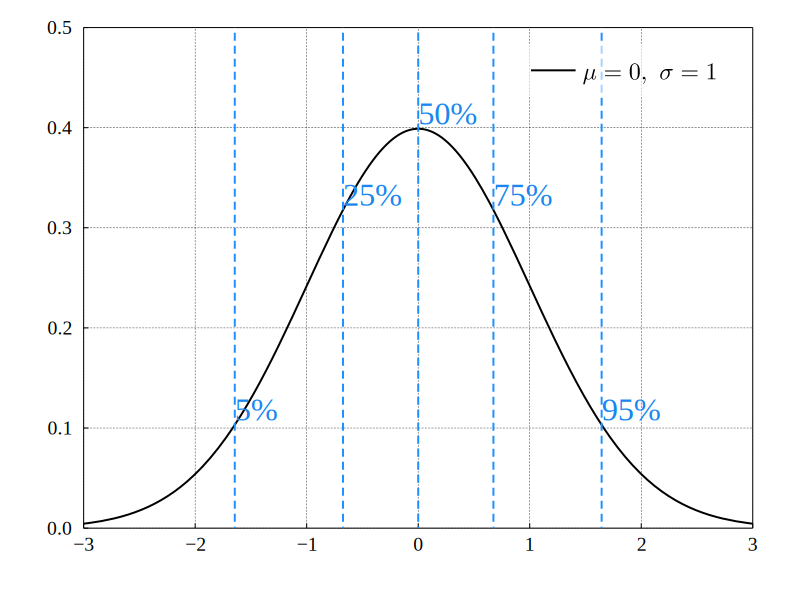

In [9]:
μ = 0
σ = 1
gausdist = Normal(μ, σ)
plt=plot(
    gausdist,
    color=:black,
    label=L"$\mu=%$μ, \ \sigma=%$σ$",
    legendfontsize=16,
    framestyle=:box,
    top_margin=5mm,
    margin=10mm
)

# Annotate quartiles/percentiles
percentiles = [0.05, 0.25, 0.5, 0.75, 0.95]
q = quantile(gausdist, percentiles)

vline!(
    q,
    color=:dodgerblue,
    ls=:dash,
    label=false
)

plot!(
    q,
    pdf.(gausdist, q),
    lw=0,
    label=false,
    annotations=(
        q,
        pdf.(gausdist, q),
        [
            text("$(Int(x*100))%", :dodgerblue2, :left, :bottom, 20, "Times")
            for (i,x) = enumerate(percentiles)
        ]
    )
)

xlims!(μ-3σ, μ+3σ)
ylims!(0,0.5)

savefig("img/Quartiles.svg")
display(plt)

# Distributions

## Various Distributions

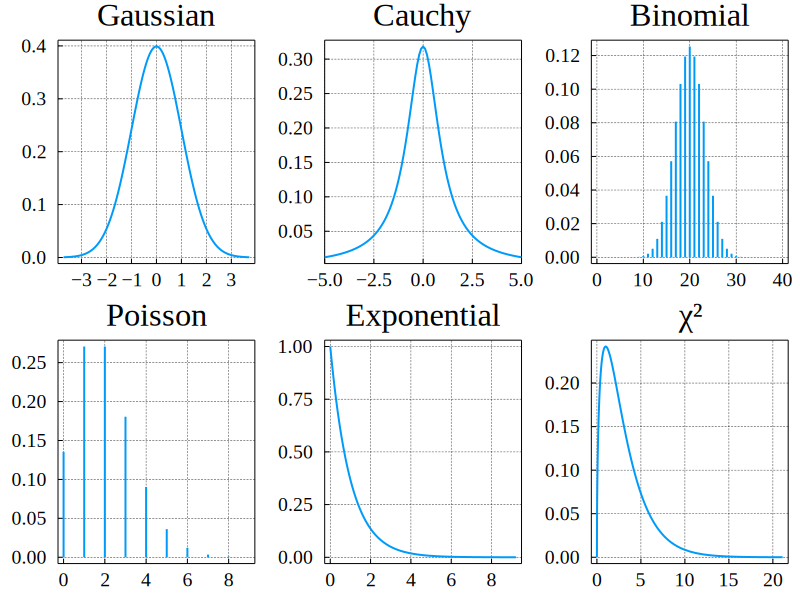

In [10]:
l = @layout [a b c; e f g]

pGaus = plot(
    Normal(),
    label=false,
    title="Gaussian"
)
pCauchy = plot(
    -5:0.1:5,
    pdf.(Cauchy(),-5:0.1:5),
    xlims=(-5,5),
    label=false,
    title="Cauchy"
)
pBin = plot(
    Binomial(40, 0.5),
    label=false,
    title="Binomial"
)
pPoisson = plot(
    Poisson(2),
    label=false,
    title="Poisson"
)
pExp = plot(
    Exponential(),
    label=false,
    title="Exponential"
)
pChisq = plot(
    Chisq(3),
    label=false,
    title="χ²"
)

plt = plot(
    pGaus,
    pCauchy,
    pBin,
    pPoisson,
    pExp,
    pChisq,
    layout=l,
    framestyle=:box,
)

savefig("img/VariousDists.svg")
display(plt)

## Gaussian

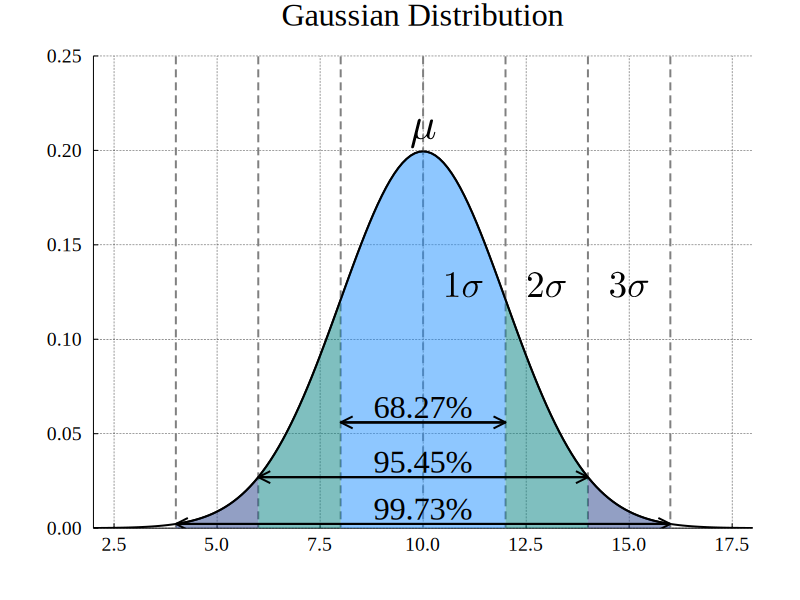

In [11]:
μ = 10
σ = 2
gausdist = Normal(μ, σ)

x = μ-5σ:0.1:μ+5σ
y = pdf.(gausdist, x)

plt=plot(
    x,
    y,
    color=:black,
    label=false,
    legend=:topright,
    legendfontsize=16,
    top_margin=5mm,
    margin=10mm
)

# Mean μ
vline!(
    [μ],
    color=:gray,
    ls=:dash,
    label=false,
)

# 1σ
lo1, hi1 = μ-σ, μ+σ
y1=pdf(gausdist, lo1)
vline!(
    [lo1, hi1],
    color=:gray,
    ls=:dash,
    label=false,
)
# Fill 1σ region
x₁=μ:0.1:hi1
plot!(
    x₁,
    pdf.(gausdist, x₁),
    color=:black,
    fill=(0,0.5,:dodgerblue),
    label=false,
)
x₁=lo1:0.1:μ
plot!(
    x₁,
    pdf.(gausdist, x₁),
    color=:black,
    fill=(0,0.5,:dodgerblue),
    label=false,
)

# 2σ
lo2, hi2 = μ-2σ, μ+2σ
y2=pdf(gausdist, lo2)
vline!(
    [lo2, hi2],
    color=:gray,
    ls=:dash,
    label=false,
)
# Fill 2σ region
x₂=hi1:0.1:hi2
plot!(
    x₂,
    pdf.(gausdist, x₂),
    color=:black,
    fill=(0,0.5,:teal),
    label=false,
)
x₂=lo2:0.1:lo1
plot!(
    x₂,
    pdf.(gausdist, x₂),
    color=:black,
    fill=(0,0.5,:teal),
    label=false,
)

# 3σ
lo3, hi3 = μ-3σ, μ+3σ
y3=pdf(gausdist, lo3)
vline!(
    [lo3, hi3],
    color=:gray,
    ls=:dash,
    label=false,
)
# Fill 3σ region
x₃=hi2:0.1:hi3
plot!(
    x₃,
    pdf.(gausdist, x₃),
    color=:black,
    fill=(0,0.5,:royalblue4),
    label=false,
)
x₃=lo3:0.1:lo2
plot!(
    x₃,
    pdf.(gausdist, x₃),
    color=:black,
    fill=(0,0.5,:royalblue4),
    label=false,
)

# Annotate
annotate!(μ, maximum(y), text(L"\mu", :black, :center, :bottom, 30, "Times"))
annotate!(
    μ+σ/2,
    pdf(gausdist, hi1),
    text(L"1\sigma", :black, :center, :bottom, 25, "Times")
)
annotate!(
    hi1+σ/2,
    pdf(gausdist, hi1),
    text(L"2\sigma", :black, :center, :bottom, 25, "Times")
)
annotate!(
    hi2+σ/2,
    pdf(gausdist, hi1),
    text(L"3\sigma", :black, :center, :bottom, 25, "Times")
)

plot!(
    [lo1, hi1],
    [y1-6.5e-2, y1-6.5e-2],
    color=:black,
    arrow=:both,
    label=false,
)
annotate!(
    μ,
    y1-6.5e-2,
    text("68.27%", :black, :center, :bottom, 20, "Times")
)

plot!(
    [lo2, hi2],
    [y2, y2],
    color=:black,
    arrow=:both,
    label=false,
)
annotate!(
    μ,
    y2,
    text("95.45%", :black, :center, :bottom, 20, "Times")
)

plot!(
    [lo3, hi3],
    [y3, y3],
    color=:black,
    arrow=:both,
    label=false,
)
annotate!(
    μ,
    y3,
    text("99.73%", :black, :center, :bottom, 20, "Times")
)

title!("Gaussian Distribution")
xlims!(μ-4σ, μ+4σ)
ylims!(0,0.25)

savefig("img/Gaussian.svg")
display(plt)

## Cauchy

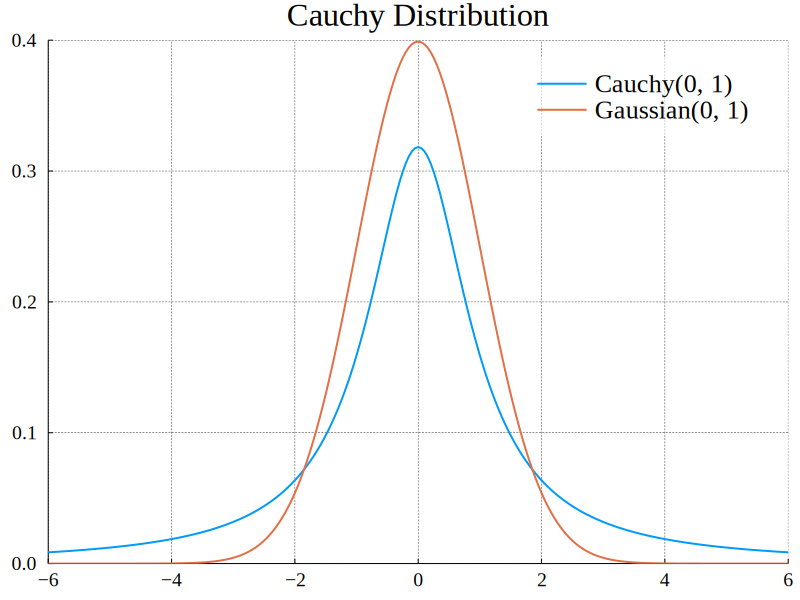

In [12]:
x = -6:0.05:6
plt = plot(
    x,
    pdf.(Cauchy(0,1), x),
    label="Cauchy(0, 1)"
)
plot!(
    x,
    pdf.(Normal(0, 1), x),
    xlims=(-5,5),
    label="Gaussian(0, 1)"
)

title!("Cauchy Distribution")
xlims!(-6,6)
ylims!(0,0.4)

savefig("img/Cauchy.svg")
display(plt)

## Binomial

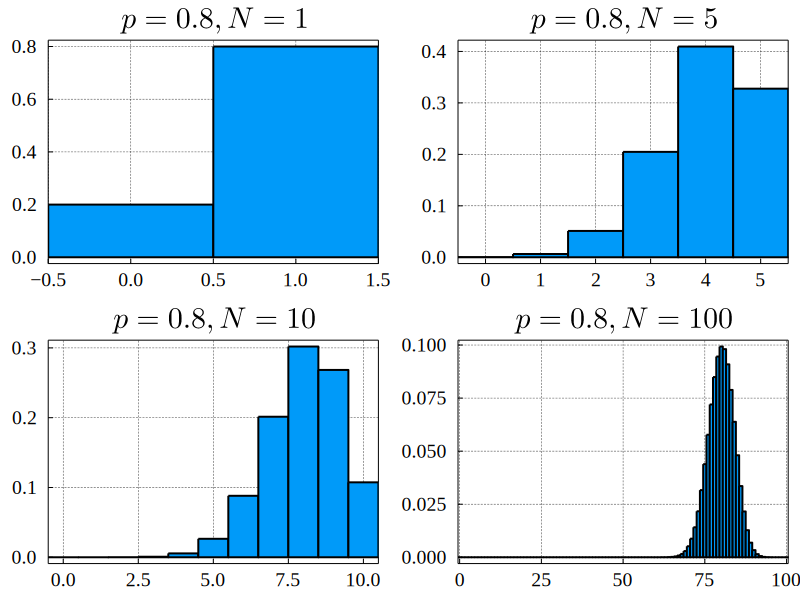

In [13]:
l = @layout [a b; c d]

p = 0.8
N = 1
x = 0:1:N+1
p1 = bar(
    x,
    pdf.(Binomial(N, p), x),
    title=L"p=%$p, N=%$N",
    label=false,
    xlim=(-0.5,N+0.5),
    bar_width = 1.0,
)

N = 5
x = 0:1:N+1
p2 = bar(
    x,
    pdf.(Binomial(N, p), x),
    title=L"p=%$p, N=%$N",
    label=false,
    xlim=(-0.5,N+0.5),
    bar_width = 1.0
)

N = 10
x = 0:1:N+1
p3 = bar(
    x,
    pdf.(Binomial(N, p), x),
    title=L"p=%$p, N=%$N",
    label=false,
    xlim=(-0.5,N+0.5),
    bar_width = 1.0
)

N = 100
x = 0:1:N+1
p4 = bar(
    x,
    pdf.(Binomial(N, p), x),
    title=L"p=%$p, N=%$N",
    label=false,
    xlim=(-0.5,N+0.5),
    bar_width = 1.0
)

plt = plot(
    p1, p2, p3, p4,
    layput=l,
    legend=:topleft,
    framestyle=:box
)
savefig("img/Binomial.svg")
display(plt)

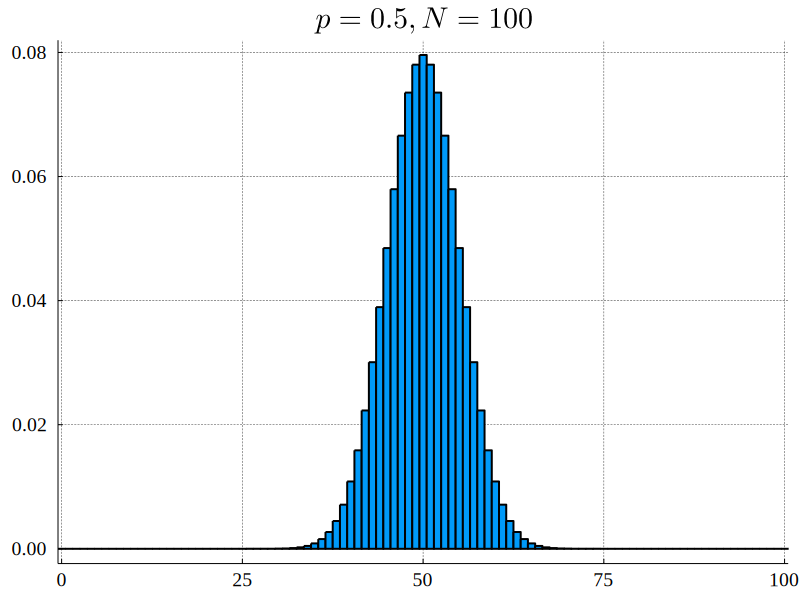

In [14]:
p = 0.5
N = 100
x = 0:1:N+1
plt = bar(
    x,
    pdf.(Binomial(N, p), x),
    title=L"p=%$p, N=%$N",
    label=false,
    xlim=(-0.5,N+0.5),
    bar_width = 1.0,
)

savefig("img/BinomialN100.svg")
display(plt)

### Binomial vs Gaus.

┌ Warning: Invalid negative or zero value 0.0 found at series index 203 for log10 based yscale
└ @ Plots /Users/takayuki/.julia/packages/Plots/dNEbX/src/utils.jl:95


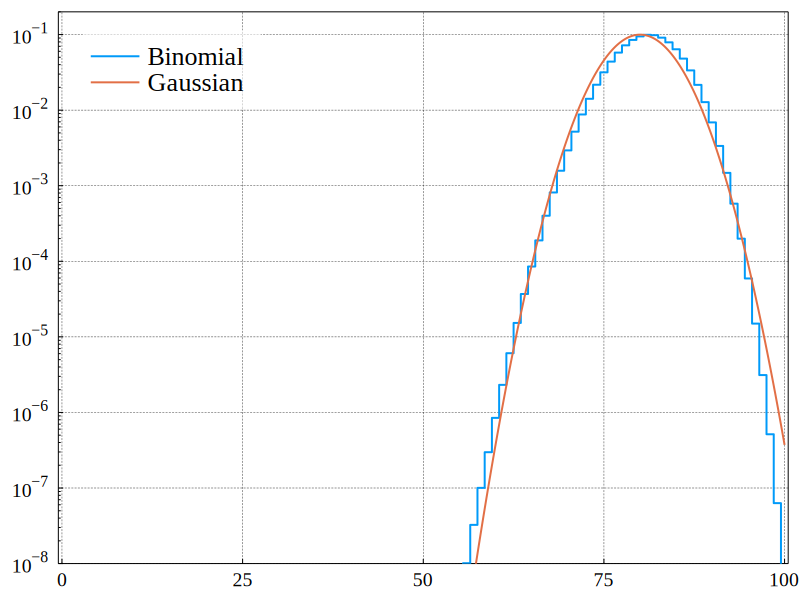

┌ Warning: Invalid negative or zero value 0.0 found at series index 203 for log10 based yscale
└ @ Plots /Users/takayuki/.julia/packages/Plots/dNEbX/src/utils.jl:95


In [15]:
p = 0.8
N = 100
x = 0:1:N+1
plt = plot(
    x .+ 0.5,
    pdf.(Binomial(N, p), x),
    label="Binomial",
    line=:step,
    xlim=(-0.5,N+0.5),
    bar_width = 1.0,
    yaxis=:log10,
    ylims=(1e-8,2e-1),
    yticks=exp10.(-8:1:1),
    yminorticks=9,
    framestyle=:box,
    legend=:topleft
)

x=0:0.1:100
plot!(
    x,
    pdf.(Normal(80, 4), x),
    label="Gaussian",
)

savefig("img/BinomialVsGaus.svg")
display(plt)

## Negative Binomial

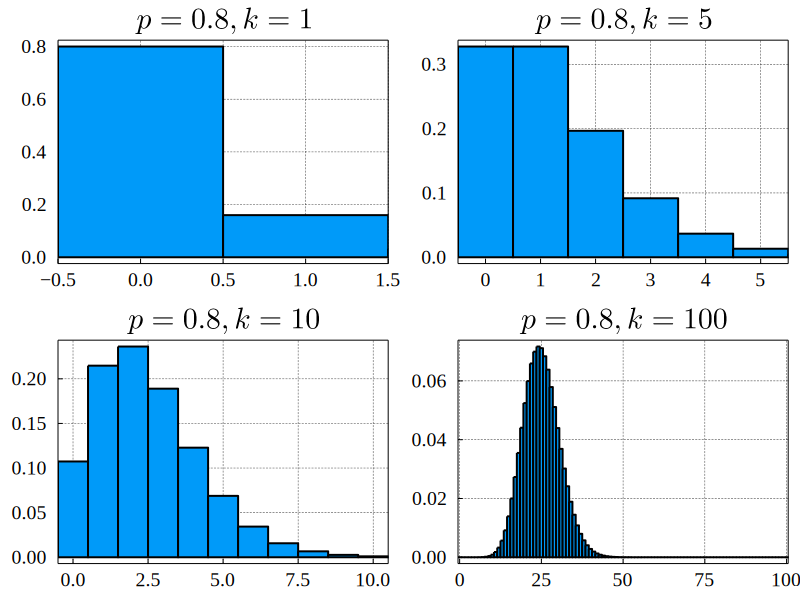

In [16]:
l = @layout [a b; c d]

p = 0.8
k = 1
x = 0:1:k+1
p1 = bar(
    x,
    pdf.(NegativeBinomial(k, p), x),
    title=L"p=%$p, k=%$k",
    label=false,
    xlim=(-0.5,k+0.5),
    bar_width = 1.0,
)

k = 5
x = 0:1:k+1
p2 = bar(
    x,
    pdf.(NegativeBinomial(k, p), x),
    title=L"p=%$p, k=%$k",
    label=false,
    xlim=(-0.5,k+0.5),
    bar_width = 1.0
)

k = 10
x = 0:1:k+1
p3 = bar(
    x,
    pdf.(NegativeBinomial(k, p), x),
    title=L"p=%$p, k=%$k",
    label=false,
    xlim=(-0.5,k+0.5),
    bar_width = 1.0
)

k = 100
x = 0:1:k+1
p4 = bar(
    x,
    pdf.(NegativeBinomial(k, p), x),
    title=L"p=%$p, k=%$k",
    label=false,
    xlim=(-0.5,k+0.5),
    bar_width = 1.0
)

plt = plot(
    p1, p2, p3, p4,
    layput=l,
    legend=:topleft,
    framestyle=:box
)
savefig("img/NegBinomial.svg")
display(plt)

## (Multinomial)

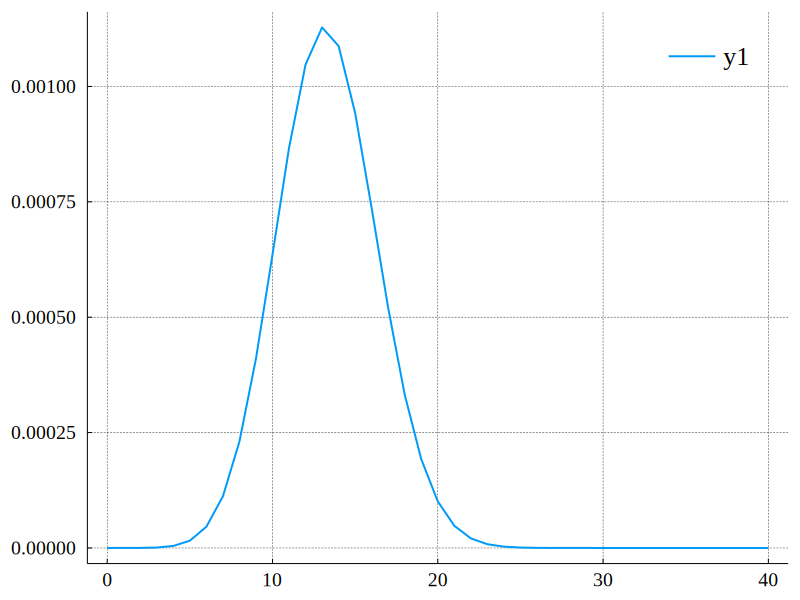

In [17]:
N=100
p=[0.1, 0.2, 0.7]
z=60
x=0:(100-z)
p=[
    pdf(Multinomial(N, p), [i, N-z-i, z]) for i = x
]
plot(x,p)

## Poisson

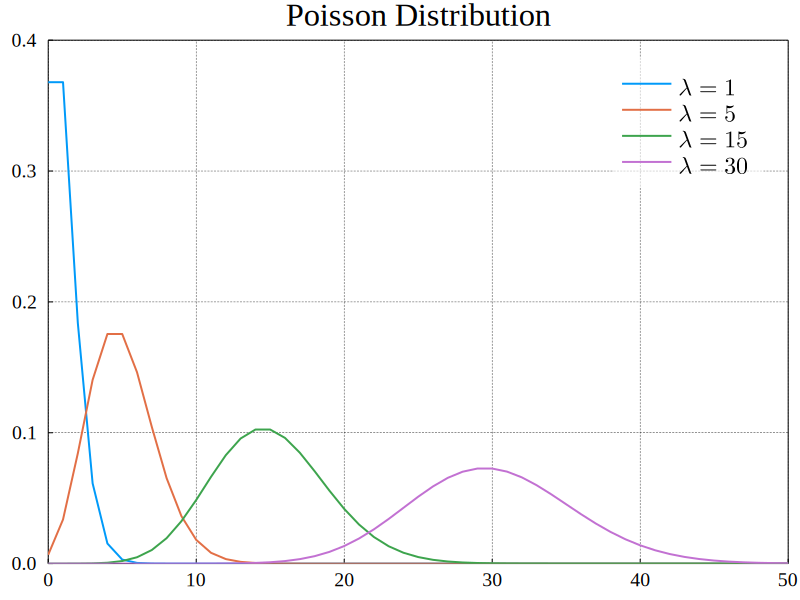

In [18]:
x = 0:1:50

λ = 1
plt=plot(
    x,
    pdf.(Poisson(λ), x),
    label=L"\lambda=%$λ",
    framestyle=:box
)

λ = 5
plot!(
    x,
    pdf.(Poisson(λ), x),
    label=L"\lambda=%$λ"
)


λ = 15
plot!(
    x,
    pdf.(Poisson(λ), x),
    label=L"\lambda=%$λ"
)

λ = 30
plot!(
    x,
    pdf.(Poisson(λ), x),
    label=L"\lambda=%$λ"
)

title!("Poisson Distribution")
xlims!(0, 50)
ylims!(0,0.4)

savefig("img/Poisson.svg")
display(plt)

### Poisson vs Gaus.

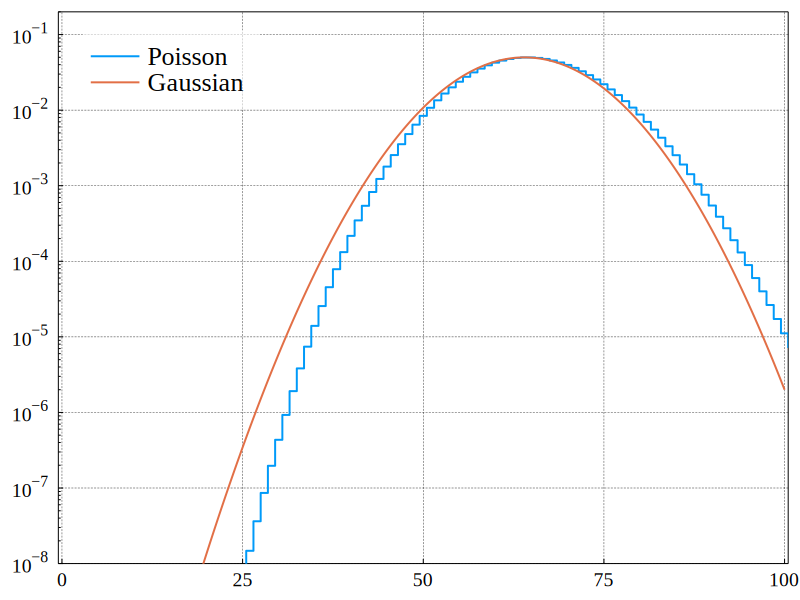

In [19]:
λ = 64
x = 0:1:100
plt = plot(
    x .+ 0.5,
    pdf.(Poisson(λ), x),
    label="Poisson",
    line=:step,
    xlim=(-0.5,N+0.5),
    bar_width = 1.0,
    yaxis=:log10,
    ylims=(1e-8,2e-1),
    yticks=exp10.(-8:1:1),
    yminorticks=9,
    framestyle=:box,
    legend=:topleft
)

x=0:0.1:100
plot!(
    x,
    pdf.(Normal(64, 8), x),
    label="Gaussian",
)

savefig("img/PoissonVsGaus.svg")
display(plt)

## Exponential

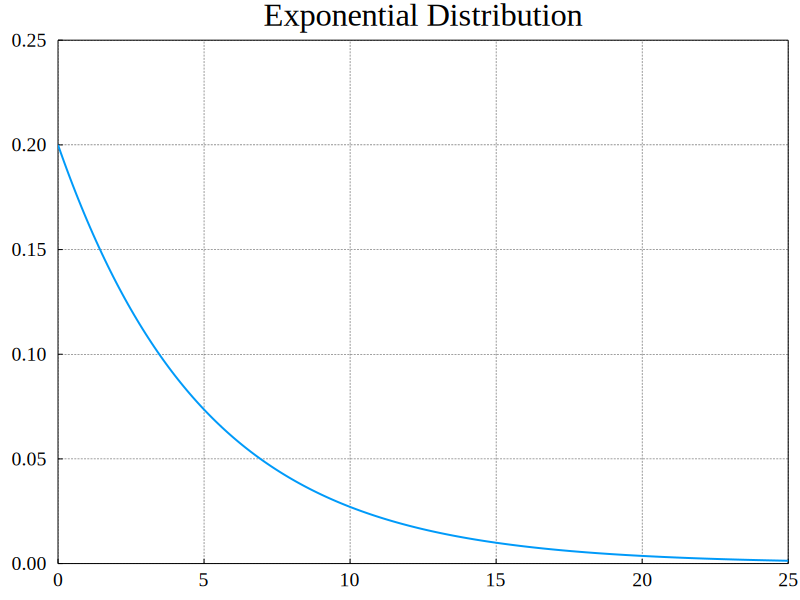

In [20]:
x = 0:0.1:25

plt=plot(
    x,
    pdf.(Exponential(5), x),
    label=false,
    framestyle=:box
)

title!("Exponential Distribution")
xlims!(0, 25)
ylims!(0,0.25)

savefig("img/Exponential.svg")
display(plt)

## Chi-squared

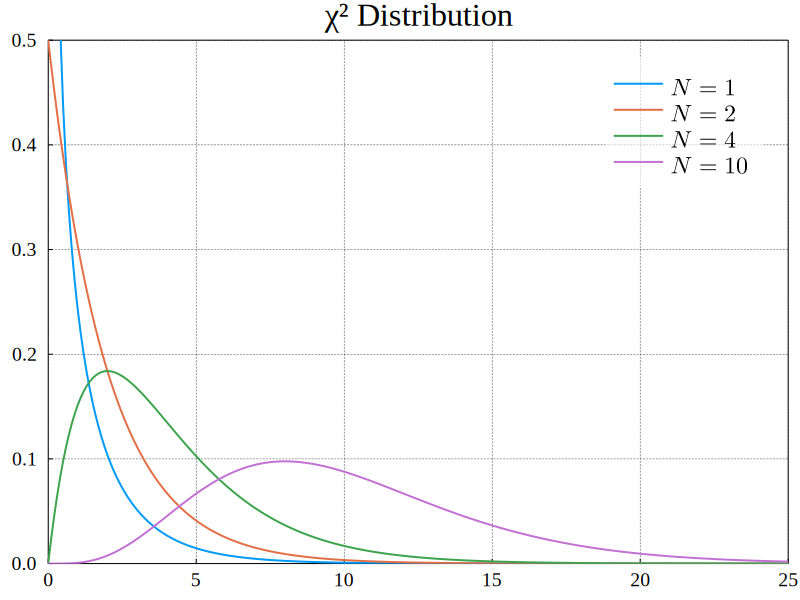

In [21]:
x = 0:0.1:25

N=1
plt=plot(
    x,
    pdf.(Chisq(N), x),
    label=L"N=%$N",
    framestyle=:box,
    legend=:topright
)

N=2
plot!(
    x,
    pdf.(Chisq(N), x),
    label=L"N=%$N",
)

N=4
plot!(
    x,
    pdf.(Chisq(N), x),
    label=L"N=%$N",
)

N=10
plot!(
    x,
    pdf.(Chisq(N), x),
    label=L"N=%$N",
)

title!("χ² Distribution")
xlims!(0, 25)
ylims!(0,0.5)

savefig("img/Chisq.svg")
display(plt)

### Chi-Squared Fit vs Gaus. Fit

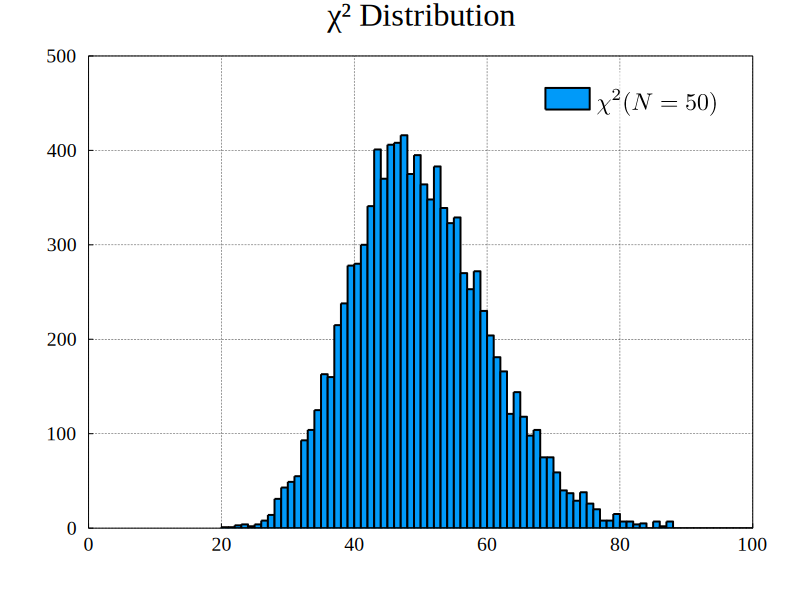

In [28]:
N=50

plt=histogram(
    rand(Chisq(N), 10000),
    bins = 100,
    label=L"\chi^2(N=%$N)",
    framestyle=:box,
    top_margin=5mm,
    margin=10mm
)



title!("χ² Distribution")
xlims!(0, 100)
ylims!(0,500)

savefig("img/ChisqFit.svg")
display(plt)